# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [28]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Preprocessing

In [29]:
df.shape

(21613, 21)

In [30]:
# print data types of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [31]:
# drop date and waterfall column 
df.drop(['date'],axis=1,inplace=True)

In [32]:
# check for missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
# function to check for outliers
def detect_outliers(df):
    outliers = []
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        for i, value in enumerate(df[col]):
            if np.abs(value - mean) > (3 * std):
                outliers.append(i)
    return list(set(outliers))

In [34]:
outlier_indices = detect_outliers(df)

In [35]:
df.drop(outlier_indices, inplace=True)

In [36]:
df.to_csv("preprocessed_data.csv", index=False)

In [37]:
# function to detect noise
def detect_noise(df):
    df = df.rolling(window=3, center=True).mean()
    return df

In [38]:
df = detect_noise(df)

In [39]:
# drop null values
df.dropna(inplace=True)

In [40]:
df.to_csv("preprocessed_data.csv", index=False)

In [41]:
X = df.drop('price', axis=1)
y = df['price']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi Linear Regression from Scratch

In [44]:
# cost function
def cost_function(X, y, w, b):

    """
    
    X: features
    y: target
    w: weights
    b: bias
    
    returns: cost
    
    """
    cost = np.sum((y - (X.dot(w) + b)) ** 2) / (2 * len(y))
    return cost

In [45]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    
    """
    
    X: features
    y: target
    w: weights
    b: bias
    learning_rate: learning rate
    iterations: number of iterations
    
    returns: weights, bias, cost history
    
    """
    
    m = len(y)
   
    costs = [0] * iterations
    
    for i in range(iterations):
        # calculate predictions
        y_pred = X.dot(w) + b
        
        # calculate loss
        loss = y_pred - y
        
        # calculate gradients
        weight_gradient = X.T.dot(loss) / m
        bais_gradient = np.sum(loss) / m
        
        # update weights and bias
        w = w - learning_rate * weight_gradient
        b = b - learning_rate * bais_gradient
        
        # store cost
        cost = cost_function(X, y, w, b)
        costs [i] = cost
        
    return w, b, costs
        

In [46]:
# initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0

weights, bias, costs = gradient_descent(X_train, y_train, w, b, learning_rate=0.01, iterations=1000)

In [47]:
print("Weights: ", weights)
print("Bias: ", bias)

Weights:  [ -1002.0707947   -9138.55756429  10883.37310707  25300.57117291
   -264.1272111   11729.95601834      0.           9798.40014011
  11681.96965145  48741.89225957  21320.35349132   8597.84566059
 -37543.25892086      0.         -10283.71859872  46798.00585169
 -10125.87007097  17692.86319995  -5392.13880094]
Bias:  481067.07008558075


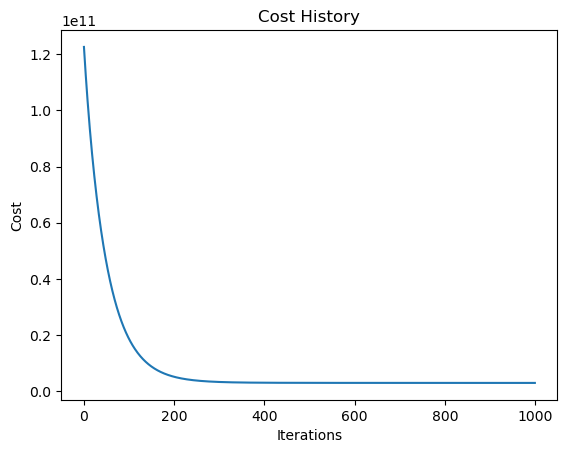

In [48]:
# plot cost history
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()


# Model Evaluation

In [49]:
def predict(X, w, b):
    
    """
    
    X: features
    w: weights
    b: bias
    
    returns: predictions
    
    """
    
    return X.dot(w) + b

In [50]:
def r2_score(y, y_pred):
    
    """
    
    y: target
    y_pred: predictions
    
    returns: r2 score
    
    """
    
    return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

In [51]:
y_pred = predict(X_test, weights, bias)

In [52]:
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.681490741883338
